Карпеченко Д.М., dz19, v.0.1, 24.12.2022

In [358]:
import numpy as np
import pandas as pd
from scipy import stats
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MMScaler
from sklearn.pipeline import Pipeline


#Снять ограничения на вывод колонок
pd.set_option('display.max_columns', None)
#Снять ограничения на вывод строк
pd.set_option('display.max_rows', 15)
data = pd.read_csv('D:\TeachMeSkills\DZ\dz19\winequality-white.csv',sep = ';', decimal='.')


In [359]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [363]:
data['quality']=data['quality'].astype('category')

In [364]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

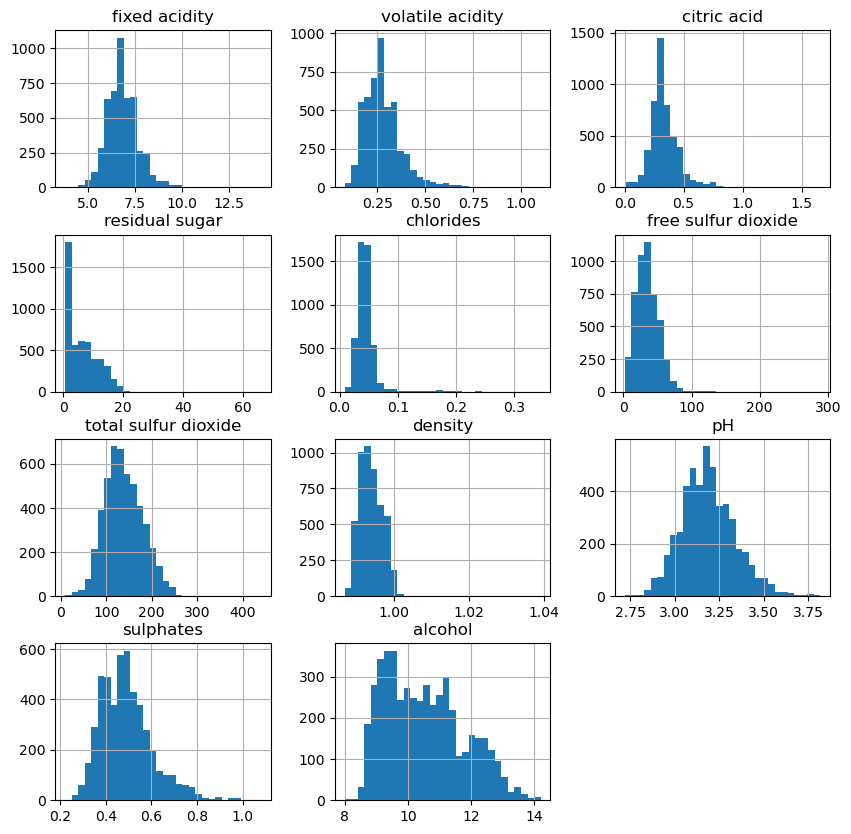

In [366]:
data.hist(bins = 30, figsize = (10, 10))

In [367]:
data_dubl=data[data.duplicated()]
data_dubl.shape

(937, 12)

In [368]:
data=data.drop_duplicates(keep='first')

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         3961 non-null   float64 
 1   volatile acidity      3961 non-null   float64 
 2   citric acid           3961 non-null   float64 
 3   residual sugar        3961 non-null   float64 
 4   chlorides             3961 non-null   float64 
 5   free sulfur dioxide   3961 non-null   float64 
 6   total sulfur dioxide  3961 non-null   float64 
 7   density               3961 non-null   float64 
 8   pH                    3961 non-null   float64 
 9   sulphates             3961 non-null   float64 
 10  alcohol               3961 non-null   float64 
 11  quality               3961 non-null   category
dtypes: category(1), float64(11)
memory usage: 375.6 KB


In [370]:
corr_matrix = data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_11820\962194556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


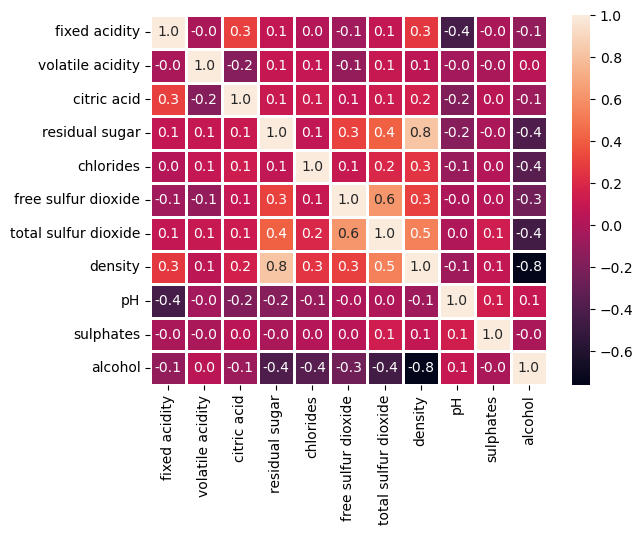

In [371]:
sns.heatmap(corr_matrix, annot=True, linewidths=1, fmt=".1f");

In [372]:
X=data.copy()
X=X.drop(['quality'], axis=1)
Y=data['quality']

In [373]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, train_size=0.7, random_state=42)

In [374]:
from catboost import CatBoostClassifier

In [375]:
model = CatBoostClassifier(
    iterations=500,
    custom_loss=['AUC', 'Accuracy'],
    use_best_model=True)

In [376]:
model.fit(
   X_train, Y_train,
   eval_set=(X_test, Y_test),
   plot=False
)

Learning rate set to 0.143608
0:	learn: 1.7377462	test: 1.7448627	best: 1.7448627 (0)	total: 10.4ms	remaining: 5.18s
1:	learn: 1.6044757	test: 1.6123575	best: 1.6123575 (1)	total: 19ms	remaining: 4.72s
2:	learn: 1.4961174	test: 1.5122222	best: 1.5122222 (2)	total: 27.8ms	remaining: 4.6s
3:	learn: 1.4265486	test: 1.4514365	best: 1.4514365 (3)	total: 36.9ms	remaining: 4.58s
4:	learn: 1.3657498	test: 1.3951771	best: 1.3951771 (4)	total: 46.2ms	remaining: 4.57s
5:	learn: 1.3188306	test: 1.3540819	best: 1.3540819 (5)	total: 54.6ms	remaining: 4.49s
6:	learn: 1.2763755	test: 1.3148203	best: 1.3148203 (6)	total: 63.3ms	remaining: 4.45s
7:	learn: 1.2416373	test: 1.2837573	best: 1.2837573 (7)	total: 72.3ms	remaining: 4.45s
8:	learn: 1.2130159	test: 1.2582220	best: 1.2582220 (8)	total: 81.2ms	remaining: 4.43s
9:	learn: 1.1862118	test: 1.2361585	best: 1.2361585 (9)	total: 90.1ms	remaining: 4.41s
10:	learn: 1.1628854	test: 1.2186762	best: 1.2186762 (10)	total: 98.8ms	remaining: 4.39s
11:	learn: 1.1

In [377]:
from sklearn.metrics import f1_score, roc_auc_score

f1_score(Y_test, model.predict(X_test),average='micro')

0.552565180824222

# Реализуем стэкинг на основе войтинга трех моделей

In [379]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [380]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rf_1 = RandomForestClassifier(n_estimators=100, random_state=42)
knn_1 = KNeighborsClassifier(n_neighbors=7)

In [381]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),  ('rf_1', rf_1), ('knn_1', knn_1)],
    voting='soft')

In [382]:
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf_1', RandomForestClassifier(random_state=42)),
                             ('knn_1', KNeighborsClassifier(n_neighbors=7))],
                 voting='soft')

In [383]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rf_1,knn_1, voting_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

LogisticRegression 0.5231286795626577
RandomForestClassifier 0.5407905803195963
KNeighborsClassifier 0.4238856181665265
VotingClassifier 0.5164003364171573


# Реализуем бэггинг

In [418]:
from sklearn.model_selection import train_test_split

x, x_1, y, y_1 = train_test_split(X,Y,test_size=0.333,stratify=Y)
x_2, x_3, y_2, y_3 = train_test_split(x,y,test_size = 0.5,train_size =0.5,stratify=Y)

ValueError: Found input variables with inconsistent numbers of samples: [2641, 3961]

In [404]:
rf_1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [405]:
X_train, X_test, Y_train, Y_test  = train_test_split(x_1,y_1, train_size=0.7, random_state=42)

In [406]:
rf_1.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [407]:
y_pred1 = rf_1.predict_proba(X_test)

In [408]:
y_pred1.shape

(397, 6)

In [409]:
X_train, X_test, Y_train, Y_test  = train_test_split(x_2,y_2, train_size=0.7, random_state=42)

In [410]:
rf_1.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [411]:
y_pred2 = rf_1.predict_proba(X_test)

In [412]:
y_pred2.shape

(397, 6)

In [413]:
X_train, X_test, Y_train, Y_test  = train_test_split(x_3,y_3, train_size=0.7, random_state=42)

In [414]:
rf_1.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [415]:
y_pred3 = rf_1.predict_proba(X_test)

In [416]:
y_pred3.shape

(397, 7)

In [417]:
y_pred3

array([[0.05, 0.04, 0.17, ..., 0.12, 0.03, 0.  ],
       [0.01, 0.02, 0.7 , ..., 0.02, 0.  , 0.  ],
       [0.  , 0.  , 0.74, ..., 0.04, 0.  , 0.  ],
       ...,
       [0.  , 0.01, 0.1 , ..., 0.33, 0.14, 0.04],
       [0.  , 0.01, 0.02, ..., 0.27, 0.06, 0.01],
       [0.  , 0.01, 0.1 , ..., 0.44, 0.03, 0.  ]])

In [349]:
a = np.array((y_pred1+y_pred2+y_pred3))

ValueError: operands could not be broadcast together with shapes (397,7) (397,6) 

In [227]:
a

array([[0.  , 0.09, 0.51, 0.99, 0.37, 0.04],
       [0.  , 0.18, 0.61, 0.81, 0.34, 0.06],
       [0.  , 0.01, 0.3 , 0.93, 0.69, 0.06],
       ...,
       [0.  , 0.03, 0.23, 1.15, 0.43, 0.16],
       [0.04, 0.07, 0.66, 1.05, 0.18, 0.  ],
       [0.  , 0.04, 0.25, 1.47, 0.22, 0.02]])

In [228]:
np.argmax(a,axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3,
       3, 2, 3, 1, 2, 3, 3, 4, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       3, 3, 3, 4, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 2, 3, 2, 2, 3, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 4, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 2, 3, 4, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 2, 4, 3, 3, 3, 4, 3, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 4, 3, 3, 2, 2, 3, 3, 2, 3, 3,

In [241]:
y_pred1.shape

(297, 6)